<a href="https://colab.research.google.com/github/ola-sumbo/Assignment-3-and-4-/blob/master/BikerLogisics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
#for data visualization
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import missingno as mssno
seed=45

In [2]:
#for ML
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

**Import Data and Clean**

In [6]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [7]:
train = pd.read_csv('/content/Train.csv', parse_dates=True)
test = pd.read_csv('/content/test.csv', parse_dates=True)

In [8]:
train.head()
test.head()

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,3:08:18 PM,4,1,3:10:19 PM,4,1,3:22:48 PM,4,1,3:26:38 PM,4,1,4:01:26 PM,13,NaN,NaN,-1.255189,36.782203,-1.320822,36.829574
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,3:34:11 PM,13,5,3:35:44 PM,13,5,3:47:03 PM,13,5,3:52:54 PM,13,5,4:21:44 PM,13,22.1,NaN,-1.240620,36.773649,-1.294744,36.762489
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,10:18:09 AM,11,1,10:18:18 AM,11,1,10:18:23 AM,11,1,10:54:39 AM,11,1,10:55:02 AM,11,29.6,NaN,-1.316711,36.830156,-1.263818,36.793006
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,4:45:37 PM,5,2,4:48:44 PM,5,2,5:07:38 PM,5,2,5:16:02 PM,5,2,6:12:00 PM,21,28.2,NaN,-1.286018,36.897534,-1.301201,36.764868
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,3:56:56 PM,11,5,3:57:09 PM,11,5,3:57:14 PM,11,5,4:11:56 PM,11,5,4:27:57 PM,11,25.4,NaN,-1.331619,36.847976,-1.293515,36.897607


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


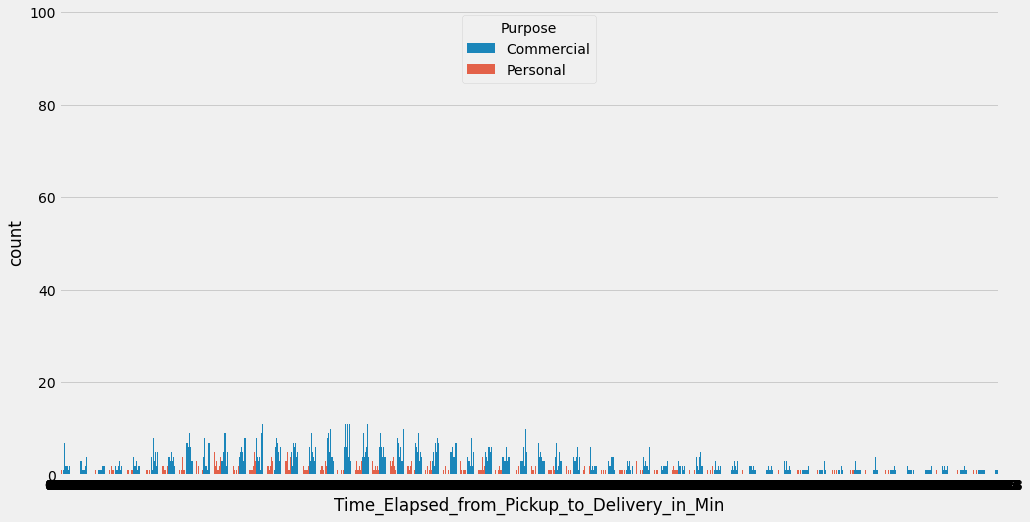

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot('Time_Elapsed_from_Pickup_to_Delivery_in_Min', hue='Purpose', data=train)
plt.show()

In [ ]:
ss = pd.read_csv('/content/sample_submission.csv')
ss.head()


,User_ID,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,UserLogger_6224,10.8
1,UserLogger_16205,10.8
2,UserLogger_17099,10.8
3,UserLogger_9892,10.8
4,UserLogger_8487,10.8


**Handling missing values**

In [ ]:
print(train.isnull().sum())

User_ID                                            0
Tranport_Vehicle                                   0
Platform                                           0
Purpose                                            0
Order_Day_of_Month                                 0
Order_Week_of_Month                                0
Time_of_Order                                      0
Order_Confirm_Day_of_Month                         0
Order_Confirm_Day_of_Weekday                       0
Time_of_Confirmation                               0
Arrival_At_Pickup_MonthDay                         0
Arrival_At_Pickup_Weekday                          0
Arrival_at_Pickup_Time                             0
Pickup_MonthDay                                    0
Pickup_WeekDay                                     0
Pickup_Time                                        0
Delivery_MonthDay                                  0
Delivery_Weekday                                   0
Delivery_Time                                 

In [ ]:
train.isna().sum()

User_ID                                            0
Tranport_Vehicle                                   0
Platform                                           0
Purpose                                            0
Order_Day_of_Month                                 0
Order_Week_of_Month                                0
Time_of_Order                                      0
Order_Confirm_Day_of_Month                         0
Order_Confirm_Day_of_Weekday                       0
Time_of_Confirmation                               0
Arrival_At_Pickup_MonthDay                         0
Arrival_At_Pickup_Weekday                          0
Arrival_at_Pickup_Time                             0
Pickup_MonthDay                                    0
Pickup_WeekDay                                     0
Pickup_Time                                        0
Delivery_MonthDay                                  0
Delivery_Weekday                                   0
Delivery_Time                                 

In [ ]:
print(test.isnull().sum())

User_ID                            0
Tranport_Vehicle                   0
Platform                           0
Purpose                            0
Order_Day_of_Month                 0
Order_Week_of_Month                0
Time_of_Order                      0
Order_Confirm_Day_of_Month         0
Order_Confirm_Day_of_Weekday       0
Time_of_Confirmation               0
Arrival_At_Pickup_MonthDay         0
Arrival_At_Pickup_Weekday          0
Arrival_at_Pickup_Time             0
Pickup_MonthDay                    0
Pickup_WeekDay                     0
Pickup_Time                        0
Delivery_MonthDay                  0
Delivery_Weekday                   0
Delivery_Time                      0
DistanceCovered_KM                 0
Temperation                     1294
Precipitation_in_millimeters    6201
Latitude_Pickup                    0
Longitude_Pickup                   0
Latitude_Destination               0
Longitude_Destination              0
dtype: int64


In [ ]:
print("The shape of the dataset is {}.\n\n".format(test.shape))
test.head()

The shape of the dataset is (6361, 26).




,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,3:08:18 PM,4,1,3:10:19 PM,4,1,3:22:48 PM,4,1,3:26:38 PM,4,1,4:01:26 PM,13,NaN,NaN,-1.255189,36.782203,-1.320822,36.829574
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,3:34:11 PM,13,5,3:35:44 PM,13,5,3:47:03 PM,13,5,3:52:54 PM,13,5,4:21:44 PM,13,22.1,NaN,-1.240620,36.773649,-1.294744,36.762489
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,10:18:09 AM,11,1,10:18:18 AM,11,1,10:18:23 AM,11,1,10:54:39 AM,11,1,10:55:02 AM,11,29.6,NaN,-1.316711,36.830156,-1.263818,36.793006
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,4:45:37 PM,5,2,4:48:44 PM,5,2,5:07:38 PM,5,2,5:16:02 PM,5,2,6:12:00 PM,21,28.2,NaN,-1.286018,36.897534,-1.301201,36.764868
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,3:56:56 PM,11,5,3:57:09 PM,11,5,3:57:14 PM,11,5,4:11:56 PM,11,5,4:27:57 PM,11,25.4,NaN,-1.331619,36.847976,-1.293515,36.897607



**Explanatory Data Analysis - ED**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14840 entries, 0 to 14839
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   User_ID                                      14840 non-null  object 
 1   Tranport_Vehicle                             14840 non-null  object 
 2   Platform                                     14840 non-null  object 
 3   Purpose                                      14840 non-null  object 
 4   Order_Day_of_Month                           14840 non-null  int64  
 5   Order_Week_of_Month                          14840 non-null  int64  
 6   Time_of_Order                                14840 non-null  object 
 7   Order_Confirm_Day_of_Month                   14840 non-null  int64  
 8   Order_Confirm_Day_of_Weekday                 14840 non-null  int64  
 9   Time_of_Confirmation                         14840 non-null  object 
 10

In [ ]:
train.dtypes

User_ID                                         object
Tranport_Vehicle                                object
Platform                                        object
Purpose                                         object
Order_Day_of_Month                               int64
Order_Week_of_Month                              int64
Time_of_Order                                   object
Order_Confirm_Day_of_Month                       int64
Order_Confirm_Day_of_Weekday                     int64
Time_of_Confirmation                            object
Arrival_At_Pickup_MonthDay                       int64
Arrival_At_Pickup_Weekday                        int64
Arrival_at_Pickup_Time                          object
Pickup_MonthDay                                  int64
Pickup_WeekDay                                   int64
Pickup_Time                                     object
Delivery_MonthDay                                int64
Delivery_Weekday                                 int64
Delivery_T

In [ ]:
train[train.duplicated()].count()

User_ID                                        0
Tranport_Vehicle                               0
Platform                                       0
Purpose                                        0
Order_Day_of_Month                             0
Order_Week_of_Month                            0
Time_of_Order                                  0
Order_Confirm_Day_of_Month                     0
Order_Confirm_Day_of_Weekday                   0
Time_of_Confirmation                           0
Arrival_At_Pickup_MonthDay                     0
Arrival_At_Pickup_Weekday                      0
Arrival_at_Pickup_Time                         0
Pickup_MonthDay                                0
Pickup_WeekDay                                 0
Pickup_Time                                    0
Delivery_MonthDay                              0
Delivery_Weekday                               0
Delivery_Time                                  0
DistanceCovered_KM                             0
Temperation         

In [9]:
#Summary Stastics
train.drop(columns = ['User_ID','Time_Elapsed_from_Pickup_to_Delivery_in_Min']).describe() 

,Order_Day_of_Month,Order_Week_of_Month,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Pickup_MonthDay,Pickup_WeekDay,Delivery_MonthDay,Delivery_Weekday,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination
count,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,11768.000000,392.000000,14840.000000,14840.000000,14840.000000,14840.000000
mean,15.623720,3.237803,15.623854,3.237938,15.623854,3.237938,15.623854,3.237938,15.623854,3.237938,9.528639,26.238222,8.034949,-1.281615,36.811004,-1.282445,36.811177
std,8.781359,1.564865,8.781303,1.564845,8.781303,1.564845,8.781303,1.564845,8.781303,1.564845,5.663128,3.620991,17.303186,0.030553,0.037578,0.034768,0.044787
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.200000,0.100000,-1.433256,36.653621,-1.423840,36.606594
25%,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,23.600000,1.000000,-1.300921,36.784605,-1.301201,36.785599
50%,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,26.400000,2.500000,-1.279395,36.806969,-1.284467,36.807943
75%,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,29.000000,5.000000,-1.257147,36.829721,-1.261252,36.829529
max,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,35.100000,99.100000,-1.147170,36.991046,-1.054634,37.012030


In [10]:
train.isnull().sum()
df = train.interpolate()

In [11]:
df.isnull().sum()
#Fill Nullable values with mean values. Median() and Mode() can be used too.
df = df.fillna(df.mean()) 
df.isnull().sum()

User_ID                                        0
Tranport_Vehicle                               0
Platform                                       0
Purpose                                        0
Order_Day_of_Month                             0
Order_Week_of_Month                            0
Time_of_Order                                  0
Order_Confirm_Day_of_Month                     0
Order_Confirm_Day_of_Weekday                   0
Time_of_Confirmation                           0
Arrival_At_Pickup_MonthDay                     0
Arrival_At_Pickup_Weekday                      0
Arrival_at_Pickup_Time                         0
Pickup_MonthDay                                0
Pickup_WeekDay                                 0
Pickup_Time                                    0
Delivery_MonthDay                              0
Delivery_Weekday                               0
Delivery_Time                                  0
DistanceCovered_KM                             0
Temperation         

In [ ]:
df.tail()

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min
14835,UserLogger_11284,Motorcycle,P3,Commercial,24,3,2:54:13 PM,24,3,2:54:39 PM,24,3,3:04:25 PM,24,3,3:12:42 PM,24,3,3:20:12 PM,2,28.5,0.4,-1.258414,36.804800,-1.257147,36.795063,7.50
14836,UserLogger_11964,Motorcycle,P3,Commercial,10,3,4:21:58 PM,10,3,4:26:46 PM,10,3,4:51:44 PM,10,3,4:59:51 PM,10,3,5:37:27 PM,7,30.3,0.4,-1.300921,36.828195,-1.272147,36.815536,37.60
14837,UserLogger_5390,Motorcycle,P3,Commercial,30,3,1:03:35 PM,30,3,1:04:56 PM,30,3,1:12:29 PM,30,3,1:19:29 PM,30,3,1:36:13 PM,6,28.0,0.4,-1.255189,36.782203,-1.249526,36.771158,16.73
14838,UserLogger_860,Motorcycle,P3,Commercial,15,3,3:17:50 PM,15,3,4:11:07 PM,15,3,4:58:45 PM,15,3,5:02:36 PM,15,3,5:43:28 PM,22,28.2,0.4,-1.326545,36.667483,-1.300921,36.828195,40.87
14839,UserLogger_15795,Motorcycle,P3,Commercial,13,3,10:39:44 AM,13,3,10:40:00 AM,13,3,10:49:43 AM,13,3,10:52:59 AM,13,3,11:05:35 AM,3,28.2,0.4,-1.255189,36.782203,-1.254673,36.808680,12.60


**Typecasting the datetime**

In [12]:
time_col = ['Time_of_Order','Time_of_Confirmation','Pickup_Time', 'Delivery_Time', 'Arrival_at_Pickup_Time']
num_col = ['Arrival_at_Pickup_Time', ' 	Order_Week_of_Month', 'Order_Confirm_Day_of_Month', 'DistanceCovered_KM'
           'Order_Confirm_Day_of_Weekday', 'Pickup_MonthDay', 'Pickup_WeekDay', 'Temperation', 'Precipitation_in_millimeters'
           'Latitude_Pickup','Longitude_Pickup','Latitude_Destination', 'Longitude_Destination'	]
id_col = ['User_ID']
cat_col = [col for col in df.columns if col not in time_col+num_col+id_col]
cat_col

['Tranport_Vehicle',
 'Platform',
 'Purpose',
 'Order_Day_of_Month',
 'Order_Week_of_Month',
 'Order_Confirm_Day_of_Weekday',
 'Arrival_At_Pickup_MonthDay',
 'Arrival_At_Pickup_Weekday',
 'Delivery_MonthDay',
 'Delivery_Weekday',
 'DistanceCovered_KM',
 'Precipitation_in_millimeters',
 'Latitude_Pickup',
 'Time_Elapsed_from_Pickup_to_Delivery_in_Min']

In [13]:
for feat in time_col:
    df[feat] = pd.to_datetime(df[feat])

In [14]:
import datetime
def extract_date_info(df,cols,):
    for feat in cols:
      df[feat +'_hour'] = df[feat].dt.hour
      df[feat +'_minute'] = df[feat].dt.minute
      df[feat +'_second'] = df[feat].dt.second
        
    df.drop(columns=time_col,axis=1,inplace=True)


In [15]:
extract_date_info(df,time_col)

In [ ]:
#df

**Handling the Categorical values**

In [ ]:
df['Tranport_Vehicle'].value_counts()

Motorcycle    14840
Name: Tranport_Vehicle, dtype: int64

In [ ]:
df['Platform'].value_counts() 	

P3    12594
P1     1533
P2      697
P4       16
Name: Platform, dtype: int64

In [ ]:
df['Purpose'].value_counts() 	

Commercial    12144
Personal       2696
Name: Purpose, dtype: int64

In [16]:
#categorical attributes
cat_attributes=['Purpose','Platform']
# df['year']=df.year.astype('category')
df['Platform']=df.Platform.astype('category')
df['Purpose']=df.Purpose.astype('category')

In [17]:
#categorical attributes
cat_attributes=['Purpose','Platform']
# df['year']=df.year.astype('category')
df['Platform']=df.Platform.astype('category')
df['Purpose']=df.Purpose.astype('category')

**Data Visualisation**

In [ ]:
#create correlation
corr = df.drop(columns=['User_ID', 'Tranport_Vehicle'], axis = 1).corr(method = 'pearson')
corr

,Order_Day_of_Month,Order_Week_of_Month,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Pickup_MonthDay,Pickup_WeekDay,Delivery_MonthDay,Delivery_Weekday,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Time_of_Order_hour,Time_of_Order_minute,Time_of_Order_second,Time_of_Confirmation_hour,Time_of_Confirmation_minute,Time_of_Confirmation_second,Pickup_Time_hour,Pickup_Time_minute,Pickup_Time_second,Delivery_Time_hour,Delivery_Time_minute,Delivery_Time_second,Arrival_at_Pickup_Time_hour,Arrival_at_Pickup_Time_minute,Arrival_at_Pickup_Time_second
Order_Day_of_Month,1.000000,0.024270,0.999998,0.024225,0.999998,0.024225,0.999998,0.024225,0.999998,0.024225,-0.010681,0.008599,-0.011190,0.003592,-0.005157,0.007955,0.004424,-0.017991,0.006706,0.001027,-0.005113,0.006898,-0.005876,0.016885,0.005068,-0.000280,-0.005007,0.003442,-0.003197,-0.006250,0.004501,-0.000185,0.005498
Order_Week_of_Month,0.024270,1.000000,0.024258,0.999945,0.024258,0.999945,0.024258,0.999945,0.024258,0.999945,-0.005137,0.017195,0.002670,-0.008454,0.009221,-0.011098,-0.015220,0.006326,-0.008377,0.010671,0.001615,-0.006637,0.009921,0.007300,-0.002646,0.001070,0.012967,-0.001397,-0.003559,-0.007472,-0.005768,0.019353,0.003617
Order_Confirm_Day_of_Month,0.999998,0.024258,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,-0.010685,0.008595,-0.011196,0.003588,-0.005149,0.007967,0.004415,-0.017987,0.006704,0.001020,-0.005134,0.006901,-0.005879,0.016886,0.005069,-0.000259,-0.004991,0.003446,-0.003202,-0.006240,0.004503,-0.000183,0.005506
Order_Confirm_Day_of_Weekday,0.024225,0.999945,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,-0.005161,0.017176,0.002633,-0.008483,0.009264,-0.011030,-0.015276,0.006352,-0.008388,0.010634,0.001494,-0.006618,0.009908,0.007302,-0.002641,0.001188,0.013054,-0.001373,-0.003586,-0.007415,-0.005757,0.019366,0.003660
Arrival_At_Pickup_MonthDay,0.999998,0.024258,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,-0.010685,0.008595,-0.011196,0.003588,-0.005149,0.007967,0.004415,-0.017987,0.006704,0.001020,-0.005134,0.006901,-0.005879,0.016886,0.005069,-0.000259,-0.004991,0.003446,-0.003202,-0.006240,0.004503,-0.000183,0.005506
Arrival_At_Pickup_Weekday,0.024225,0.999945,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,-0.005161,0.017176,0.002633,-0.008483,0.009264,-0.011030,-0.015276,0.006352,-0.008388,0.010634,0.001494,-0.006618,0.009908,0.007302,-0.002641,0.001188,0.013054,-0.001373,-0.003586,-0.007415,-0.005757,0.019366,0.003660
Pickup_MonthDay,0.999998,0.024258,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,-0.010685,0.008595,-0.011196,0.003588,-0.005149,0.007967,0.004415,-0.017987,0.006704,0.001020,-0.005134,0.006901,-0.005879,0.016886,0.005069,-0.000259,-0.004991,0.003446,-0.003202,-0.006240,0.004503,-0.000183,0.005506
Pickup_WeekDay,0.024225,0.999945,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,-0.005161,0.017176,0.002633,-0.008483,0.009264,-0.011030,-0.015276,0.006352,-0.008388,0.010634,0.001494,-0.006618,0.009908,0.007302,-0.002641,0.001188,0.013054,-0.001373,-0.003586,-0.007415,-0.005757,0.019366,0.003660
Delivery_MonthDay,0.999998,0.024258,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,-0.010685,0.008595,-0.011196,0.003588,-0.005149,0.007967,0.004415,-0.017987,0.006704,0.001020,-0.005134,0.006901,-0.005879,0.016886,0.005069,-0.000259,-0.004991,0.003446,-0.003202,-0.006240,0.004503,-0.000183,0.005506
Delivery_Weekday,0.024225,0.999945,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,0.024232,1.000000,-0.005161,0.017176,0.002633,-0.008483,0.009264,-0.011030,-0.015276,0.006352,-0.008388,0.010634,0.001494,-0.006618,0.009908,0.007302,-0.002641,0.001188,0.013054,-0.001373,-0.003586,-0

In [ ]:
#convert correlation to numpy array
mask = np.array(corr)

**Heat Map**

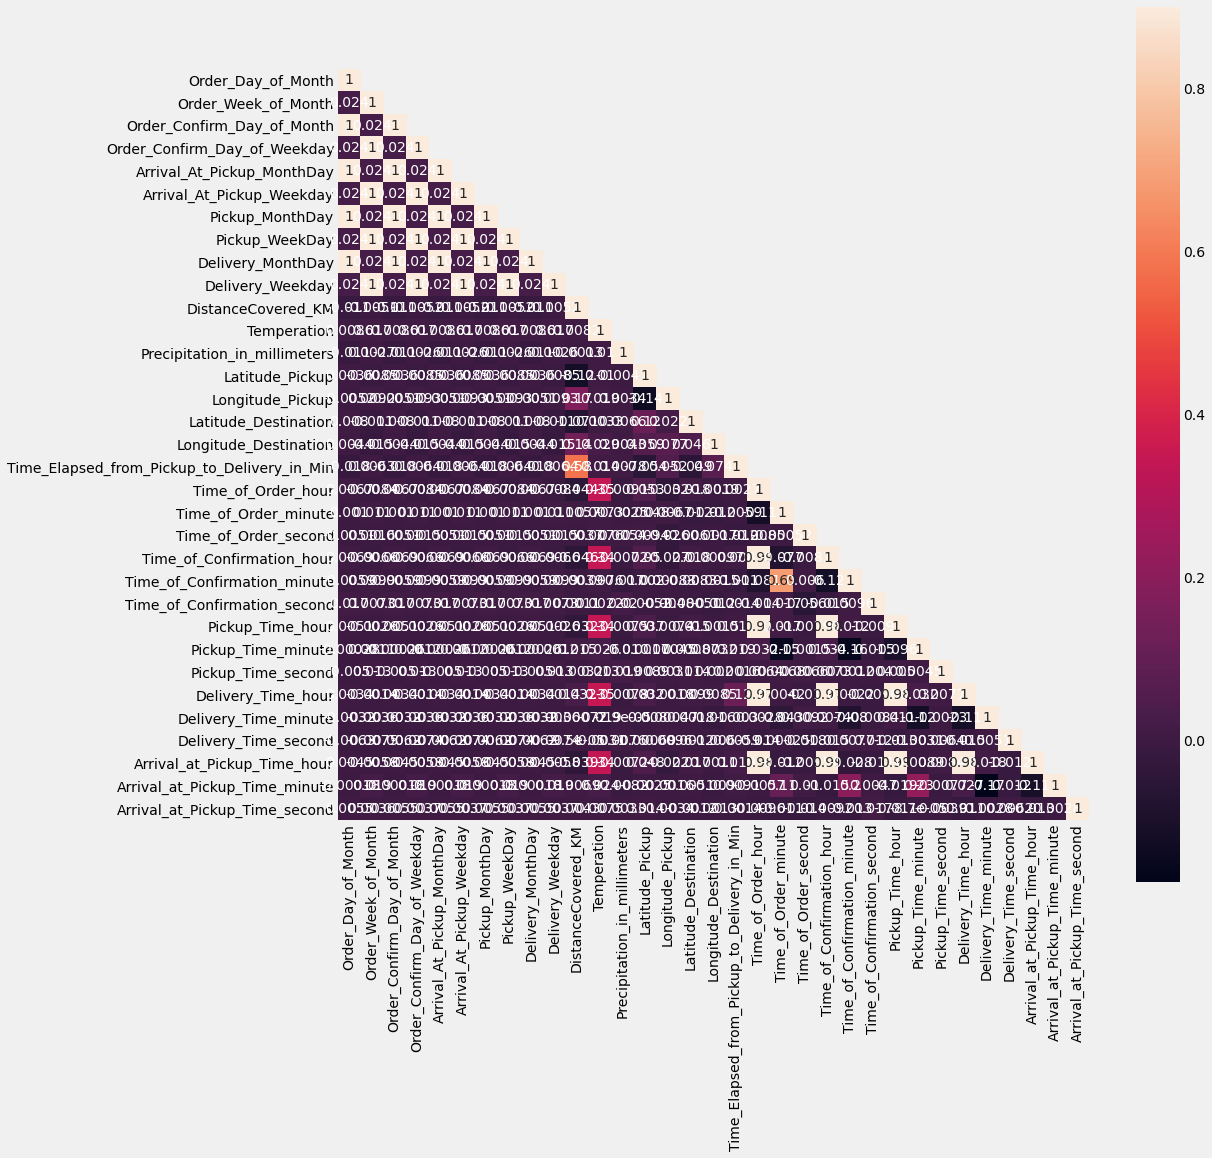

In [ ]:
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

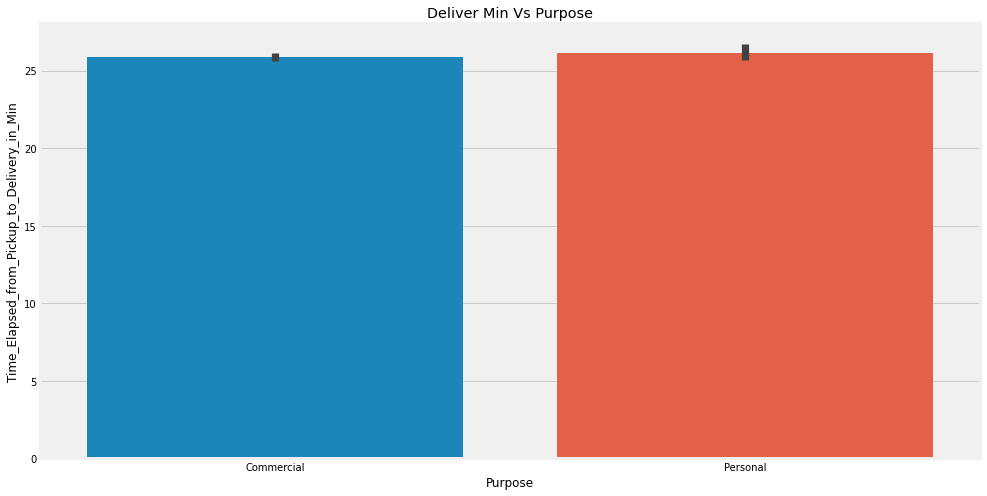

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for Seasons distribution of counts
sns.barplot(data=df,x='Purpose',y='Time_Elapsed_from_Pickup_to_Delivery_in_Min')
ax.set_title('Deliver Min Vs Purpose')
plt.show()


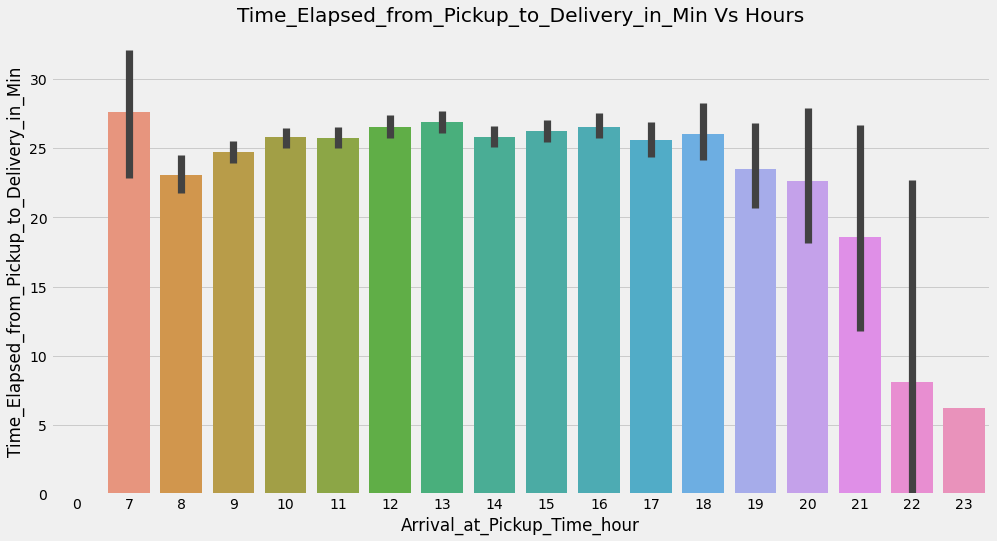

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for Hours distribution of counts
sns.barplot(data=df,x='Arrival_at_Pickup_Time_hour',y='Time_Elapsed_from_Pickup_to_Delivery_in_Min')
ax.set_title('Time_Elapsed_from_Pickup_to_Delivery_in_Min Vs Hours')
plt.show()

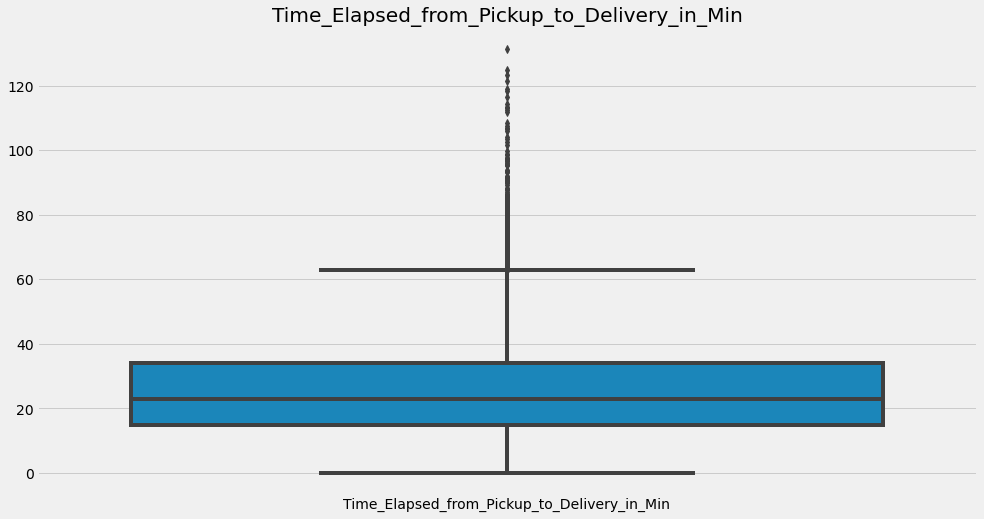

In [ ]:
#Total_outliers
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['Time_Elapsed_from_Pickup_to_Delivery_in_Min']])
ax.set_title('Time_Elapsed_from_Pickup_to_Delivery_in_Min')
plt.show()

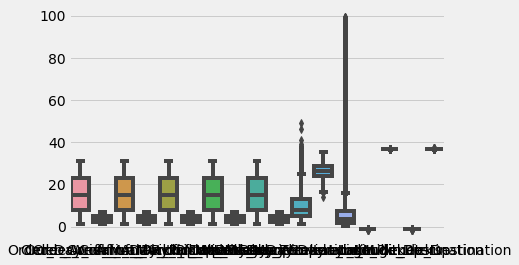

In [ ]:
sns.boxplot(data=df[['Order_Day_of_Month','Order_Week_of_Month','Order_Confirm_Day_of_Month','Order_Confirm_Day_of_Weekday','Arrival_At_Pickup_MonthDay','Arrival_At_Pickup_Weekday','Pickup_MonthDay','Pickup_WeekDay', 	'Delivery_MonthDay', 	'Delivery_Weekday','DistanceCovered_KM','Temperation','Precipitation_in_millimeters','Latitude_Pickup','Longitude_Pickup','Latitude_Destination','Longitude_Destination' ]])
ax.set_title('Others_outiers')
plt.show()

**Encoding Caegroical variables**

In [18]:
#To get dummy variables to encode the categorical features to numeric
encoded_pd=pd.get_dummies(df,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_pd.shape)
encoded_pd.head()
df=encoded_pd
df.head()

Shape of transfomed dataframe:: (14840, 41)


,User_ID,Tranport_Vehicle,Order_Day_of_Month,Order_Week_of_Month,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Pickup_MonthDay,Pickup_WeekDay,Delivery_MonthDay,Delivery_Weekday,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Time_of_Order_hour,Time_of_Order_minute,Time_of_Order_second,Time_of_Confirmation_hour,Time_of_Confirmation_minute,Time_of_Confirmation_second,Pickup_Time_hour,Pickup_Time_minute,Pickup_Time_second,Delivery_Time_hour,Delivery_Time_minute,Delivery_Time_second,Arrival_at_Pickup_Time_hour,Arrival_at_Pickup_Time_minute,Arrival_at_Pickup_Time_second,Purpose_Commercial,Purpose_Personal,Platform_P1,Platform_P2,Platform_P3,Platform_P4
0,UserLogger_7277,Motorcycle,27,1,27,1,27,1,27,1,27,1,6,20.9,1.0,-1.285772,36.808806,-1.296310,36.768822,23.47,9,18,22,9,18,42,9,48,2,10,11,30,9,46,23,1,0,0,0,1,0
1,UserLogger_1281,Motorcycle,25,1,25,1,25,1,25,1,25,1,9,29.9,1.3,-1.229148,36.844029,-1.252492,36.865620,16.90,12,7,4,12,8,36,12,45,15,13,2,9,12,41,16,1,0,0,0,1,0
2,UserLogger_2566,Motorcycle,12,6,12,6,12,6,12,6,12,6,9,28.5,1.6,-1.318062,36.849326,-1.265715,36.823815,21.83,13,20,11,13,34,44,13,58,20,14,20,10,13,54,51,1,0,0,0,1,0
3,UserLogger_11805,Motorcycle,28,4,28,4,28,4,28,4,28,4,9,26.8,1.9,-1.263818,36.793006,-1.300406,36.829741,0.05,11,13,53,11,14,7,11,53,20,11,53,23,11,25,32,1,0,0,0,1,0
4,UserLogger_15199,Motorcycle,12,2,12,2,12,2,12,2,12,2,7,30.1,2.2,-1.263813,36.784977,-1.294875,36.793891,27.57,13,41,2,13,41,57,14,45,15,15,12,49,14,40,49,1,0,0,0,1,0


**Data Splitting**

In [19]:
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(train, groups=train['User_ID']))

train_n = train.iloc[train_inds]
test_n = train.iloc[test_inds]

In [20]:
# segmenting 
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')



X = df.drop(['User_ID','Tranport_Vehicle','Time_Elapsed_from_Pickup_to_Delivery_in_Min'], axis=1)

y = df['Time_Elapsed_from_Pickup_to_Delivery_in_Min']

**
Looking at the distribution of Target variable**

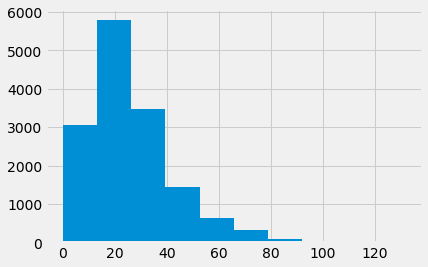

In [ ]:
df['Time_Elapsed_from_Pickup_to_Delivery_in_Min'].hist()

**Model Training**

In [21]:
df_n = df.drop(['User_ID','Tranport_Vehicle','Time_Elapsed_from_Pickup_to_Delivery_in_Min'], axis=1)


In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [23]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x)
    return cost, grad


In [24]:
def fit(x, y, max_iter=5000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs


In [25]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    return [classes[p] for p in preds]


In [26]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    return [classes[p] for p in preds]


In [27]:
data = np.array(df_n)
np.random.shuffle(data)
num_train = int(.7 * len(data))  # 70/30 train/test split
x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_train:, :-1], data[num_train:, -1]


In [28]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(x_train, x_test)

array([[ 1.16726704,  1.11605804,  1.16725599, ..., -0.33886798,
        -0.22392304,  0.42290309],
       [ 1.73561939, -0.15810516,  1.73561362, ..., -0.33886798,
        -0.22392304,  0.42290309],
       [-0.31044907, -0.15810516, -0.31047383, ..., -0.33886798,
        -0.22392304,  0.42290309],
       ...,
       [-0.99247189, -0.79518676, -0.99250298, ..., -0.33886798,
        -0.22392304,  0.42290309],
       [-0.65146048,  1.11605804, -0.65148841, ..., -0.33886798,
        -0.22392304,  0.42290309],
       [ 0.14423281, -0.15810516,  0.14421227, ..., -0.33886798,
        -0.22392304,  0.42290309]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


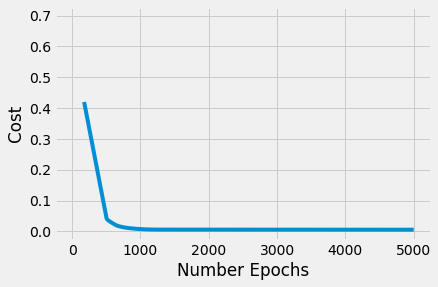

In [29]:
thetas, classes, costs = fit(x_train[:, 2:], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');


In [30]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

print(f"Train Accuracy: {score(classes, thetas, x_train[:, 2:], y_train):.3f}")
print(f"Test Accuracy: {score(classes, thetas, x_test[:, 2:], y_test):.3f}")


Train Accuracy: 0.999
Test Accuracy: 0.999


In [31]:
thetas, classes, costs = fit(x_train, y_train)
print(f"Train Accuracy: {score(classes, thetas, x_train, y_train):.3f}")
print(f"Test Accuracy: {score(classes, thetas, x_test, y_test):.3f}")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Train Accuracy: 0.999
Test Accuracy: 0.999


**Random forest Classifier**

In [33]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500)

In [34]:
#Fit the trained model
rf.fit(x_train,y_train)

#Cross validation prediction
predict=rf.predict(x_test)
print(predict.shape)

(4452,)


In [35]:
#accuracy of the model
rf_score =rf.score(x_test,y_test)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.2706096608187135


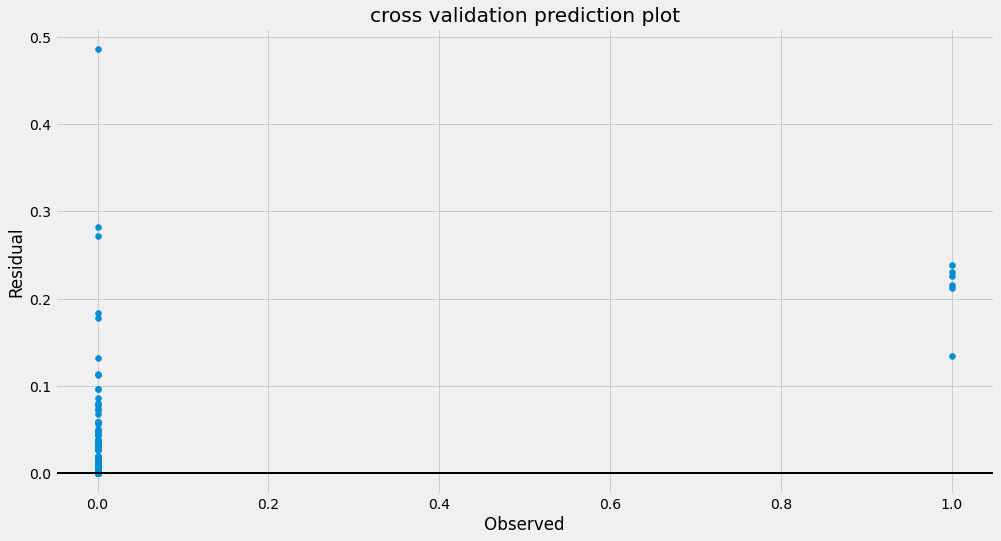

In [36]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_test,predict)
ax.axhline(lw=2,color='black')
ax.set_title('cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

**RMSLE**

In [37]:
from sklearn.metrics import mean_squared_log_error 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( predict , y_test) )))

RMSLE:0.021214983932238023


**test Set**

In [121]:
test.isnull().sum()
dfj = test.interpolate()

In [122]:
dfj.isnull().sum()
#Fill Nullable values with mean values. Median() and Mode() can be used too.
dfj = dfj.fillna(dfj.mean()) 
dfj.isnull().sum()

User_ID                                        0
Tranport_Vehicle                               0
Platform                                       0
Purpose                                        0
Order_Day_of_Month                             0
Order_Week_of_Month                            0
Time_of_Order                                  0
Order_Confirm_Day_of_Month                     0
Order_Confirm_Day_of_Weekday                   0
Time_of_Confirmation                           0
Arrival_At_Pickup_MonthDay                     0
Arrival_At_Pickup_Weekday                      0
Arrival_at_Pickup_Time                         0
Pickup_MonthDay                                0
Pickup_WeekDay                                 0
Pickup_Time                                    0
Delivery_MonthDay                              0
Delivery_Weekday                               0
Delivery_Time                                  0
DistanceCovered_KM                             0
Temperation         

In [123]:
for feat in time_col:
    dfj[feat] = pd.to_datetime(dfj[feat])

In [124]:
import datetime
def extract_date_info(dfj,cols,):
    for feat in cols:
      dfj[feat +'_hour'] = dfj[feat].dt.hour
      dfj[feat +'_minute'] = dfj[feat].dt.minute
      dfj[feat +'_second'] = dfj[feat].dt.second
        
    dfj.drop(columns=time_col,axis=1,inplace=True)

In [125]:
extract_date_info(dfj,time_col)

In [126]:
#To get dummy variables to encode the categorical features to numeric
encoded_pdj=pd.get_dummies(dfj,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_pdj.shape)
encoded_pdj.head()
dfj=encoded_pdj
dfj.head()

Shape of transfomed dataframe:: (6361, 41)


,User_ID,Tranport_Vehicle,Order_Day_of_Month,Order_Week_of_Month,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Pickup_MonthDay,Pickup_WeekDay,Delivery_MonthDay,Delivery_Weekday,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Time_of_Order_hour,Time_of_Order_minute,Time_of_Order_second,Time_of_Confirmation_hour,Time_of_Confirmation_minute,Time_of_Confirmation_second,Pickup_Time_hour,Pickup_Time_minute,Pickup_Time_second,Delivery_Time_hour,Delivery_Time_minute,Delivery_Time_second,Arrival_at_Pickup_Time_hour,Arrival_at_Pickup_Time_minute,Arrival_at_Pickup_Time_second,Purpose_Commercial,Purpose_Personal,Platform_P1,Platform_P2,Platform_P3,Platform_P4
0,UserLogger_6224,Motorcycle,4,1,4,1,4,1,4,1,4,1,13,26.324686,8.221516,-1.255189,36.782203,-1.320822,36.829574,0.0,15,8,18,15,10,19,15,26,38,16,1,26,15,22,48,1,0,0,0,1,0
1,UserLogger_16205,Motorcycle,13,5,13,5,13,5,13,5,13,5,13,22.100000,8.221516,-1.240620,36.773649,-1.294744,36.762489,0.0,15,34,11,15,35,44,15,52,54,16,21,44,15,47,3,0,1,1,0,0,0
2,UserLogger_17099,Motorcycle,11,1,11,1,11,1,11,1,11,1,11,29.600000,8.221516,-1.316711,36.830156,-1.263818,36.793006,0.0,10,18,9,10,18,18,10,54,39,10,55,2,10,18,23,1,0,0,0,1,0
3,UserLogger_9892,Motorcycle,5,2,5,2,5,2,5,2,5,2,21,28.200000,8.221516,-1.286018,36.897534,-1.301201,36.764868,0.0,16,45,37,16,48,44,17,16,2,18,12,0,17,7,38,1,0,0,0,1,0
4,UserLogger_8487,Motorcycle,11,5,11,5,11,5,11,5,11,5,11,25.400000,8.221516,-1.331619,36.847976,-1.293515,36.897607,0.0,15,56,56,15,57,9,16,11,56,16,27,57,15,57,14,1,0,0,0,1,0


In [57]:
time_col = ['Time_of_Order','Time_of_Confirmation','Pickup_Time', 'Delivery_Time', 'Arrival_at_Pickup_Time']
num_col = ['Arrival_at_Pickup_Time', ' 	Order_Week_of_Month', 'Order_Confirm_Day_of_Month', 'DistanceCovered_KM'
           'Order_Confirm_Day_of_Weekday', 'Pickup_MonthDay', 'Pickup_WeekDay', 'Temperation', 'Precipitation_in_millimeters'
           'Latitude_Pickup','Longitude_Pickup','Latitude_Destination', 'Longitude_Destination'	]
id_col = ['User_ID']
cat_col = [col for col in dfj.columns if col not in time_col+num_col+id_col]
cat_col

['Tranport_Vehicle',
 'Order_Day_of_Month',
 'Order_Week_of_Month',
 'Order_Confirm_Day_of_Weekday',
 'Arrival_At_Pickup_MonthDay',
 'Arrival_At_Pickup_Weekday',
 'Delivery_MonthDay',
 'Delivery_Weekday',
 'DistanceCovered_KM',
 'Precipitation_in_millimeters',
 'Latitude_Pickup',
 'Time_of_Order_hour',
 'Time_of_Order_minute',
 'Time_of_Order_second',
 'Time_of_Confirmation_hour',
 'Time_of_Confirmation_minute',
 'Time_of_Confirmation_second',
 'Pickup_Time_hour',
 'Pickup_Time_minute',
 'Pickup_Time_second',
 'Delivery_Time_hour',
 'Delivery_Time_minute',
 'Delivery_Time_second',
 'Arrival_at_Pickup_Time_hour',
 'Arrival_at_Pickup_Time_minute',
 'Arrival_at_Pickup_Time_second',
 'Purpose_Commercial',
 'Purpose_Personal',
 'Platform_P1',
 'Platform_P2',
 'Platform_P3',
 'Platform_P4']

In [45]:
# segmenting 
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


X_n = dfj.drop(['User_ID','Tranport_Vehicle', 'Platform_P3' ], axis=1).values


In [46]:
 np. size(X_n, 1)

37

In [48]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(X_n)

array([[-1.32630106, -1.4275225 , -1.3263141 , ..., -0.32686136,
        -0.21578084, -0.02508441],
       [-0.3081257 ,  1.11549245, -0.30814238, ...,  3.05940106,
        -0.21578084, -0.02508441],
       [-0.53438689, -1.4275225 , -0.53440277, ..., -0.32686136,
        -0.21578084, -0.02508441],
       ...,
       [-0.64751749,  1.11549245, -0.64753296, ..., -0.32686136,
        -0.21578084, -0.02508441],
       [ 0.82318026, -0.15601503,  0.82315953, ..., -0.32686136,
        -0.21578084, -0.02508441],
       [ 1.16257204,  1.75124618,  1.1625501 , ..., -0.32686136,
        -0.21578084, -0.02508441]])

In [49]:
#predict the model
y_test_predicted = rf.predict(X_n)
test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'] = y_test_predicted
test

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,3:08:18 PM,4,1,3:10:19 PM,4,1,3:22:48 PM,4,1,3:26:38 PM,4,1,4:01:26 PM,13,NaN,NaN,-1.255189,36.782203,-1.320822,36.829574,0.132
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,3:34:11 PM,13,5,3:35:44 PM,13,5,3:47:03 PM,13,5,3:52:54 PM,13,5,4:21:44 PM,13,22.1,NaN,-1.240620,36.773649,-1.294744,36.762489,0.000
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,10:18:09 AM,11,1,10:18:18 AM,11,1,10:18:23 AM,11,1,10:54:39 AM,11,1,10:55:02 AM,11,29.6,NaN,-1.316711,36.830156,-1.263818,36.793006,0.162
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,4:45:37 PM,5,2,4:48:44 PM,5,2,5:07:38 PM,5,2,5:16:02 PM,5,2,6:12:00 PM,21,28.2,NaN,-1.286018,36.897534,-1.301201,36.764868,0.188
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,3:56:56 PM,11,5,3:57:09 PM,11,5,3:57:14 PM,11,5,4:11:56 PM,11,5,4:27:57 PM,11,25.4,NaN,-1.331619,36.847976,-1.293515,36.897607,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,UserLogger_5667,Motorcycle,P3,Commercial,9,3,3:10:47 PM,9,3,3:11:12 PM,9,3,3:24:08 PM,9,3,3:45:36 PM,9,3,4:43:13 PM,14,26.5,NaN,-1.237705,36.766328,-1.310627,36.819216,0.136
6357,UserLogger_3177,Motorcycle,P3,Commercial,27,3,9:55:42 AM,27,3,9:58:12 AM,27,3,10:12:51 AM,27,3,10:14:50 AM,27,3,10:39:18 AM,7,NaN,NaN,-1.321019,36.841055,-1.285064,36.813096,0.136
6358,UserLogger_2799,Motorcycle,P3,Commercial,10,5,4:58:49 PM,10,5,5:00:47 PM,10,5,5:11:56 PM,10,5,5:22:55 PM,10,5,5:52:28 PM,14,NaN,NaN,-1.258414,36.804800,-1.207546,36.791398,0.130
6359,UserLogger_7931,Motorcycle,P3,Commercial,23,3,9:47:17 AM,23,3,9:48:01 AM,23,3,10:02:17 AM,23,3,10:18:33 AM,23,3,10:27:45 AM,5,NaN,NaN,-1.260093,36.808869,-1.265715,36.823815,0.130


In [50]:
test[['User_ID', 'Time_Elapsed_from_Pickup_to_Delivery_in_Min']].to_csv('submission.csv', index=False)

**Classifiers**

In [51]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [53]:
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [58]:
#accuracy of the model
clf_score =clf.score(x_test,y_test)
print('Accuracy of the model :',clf_score)

Accuracy of the model : 0.9986522911051213


In [54]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9986522911051213


In [55]:
#predict the model
y_test_predict = clf.predict(X_n)
test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'] = y_test_predict
test

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,3:08:18 PM,4,1,3:10:19 PM,4,1,3:22:48 PM,4,1,3:26:38 PM,4,1,4:01:26 PM,13,NaN,NaN,-1.255189,36.782203,-1.320822,36.829574,0.0
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,3:34:11 PM,13,5,3:35:44 PM,13,5,3:47:03 PM,13,5,3:52:54 PM,13,5,4:21:44 PM,13,22.1,NaN,-1.240620,36.773649,-1.294744,36.762489,0.0
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,10:18:09 AM,11,1,10:18:18 AM,11,1,10:18:23 AM,11,1,10:54:39 AM,11,1,10:55:02 AM,11,29.6,NaN,-1.316711,36.830156,-1.263818,36.793006,0.0
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,4:45:37 PM,5,2,4:48:44 PM,5,2,5:07:38 PM,5,2,5:16:02 PM,5,2,6:12:00 PM,21,28.2,NaN,-1.286018,36.897534,-1.301201,36.764868,0.0
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,3:56:56 PM,11,5,3:57:09 PM,11,5,3:57:14 PM,11,5,4:11:56 PM,11,5,4:27:57 PM,11,25.4,NaN,-1.331619,36.847976,-1.293515,36.897607,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,UserLogger_5667,Motorcycle,P3,Commercial,9,3,3:10:47 PM,9,3,3:11:12 PM,9,3,3:24:08 PM,9,3,3:45:36 PM,9,3,4:43:13 PM,14,26.5,NaN,-1.237705,36.766328,-1.310627,36.819216,0.0
6357,UserLogger_3177,Motorcycle,P3,Commercial,27,3,9:55:42 AM,27,3,9:58:12 AM,27,3,10:12:51 AM,27,3,10:14:50 AM,27,3,10:39:18 AM,7,NaN,NaN,-1.321019,36.841055,-1.285064,36.813096,0.0
6358,UserLogger_2799,Motorcycle,P3,Commercial,10,5,4:58:49 PM,10,5,5:00:47 PM,10,5,5:11:56 PM,10,5,5:22:55 PM,10,5,5:52:28 PM,14,NaN,NaN,-1.258414,36.804800,-1.207546,36.791398,0.0
6359,UserLogger_7931,Motorcycle,P3,Commercial,23,3,9:47:17 AM,23,3,9:48:01 AM,23,3,10:02:17 AM,23,3,10:18:33 AM,23,3,10:27:45 AM,5,NaN,NaN,-1.260093,36.808869,-1.265715,36.823815,0.0


In [59]:
test[['User_ID', 'Time_Elapsed_from_Pickup_to_Delivery_in_Min']].to_csv('submissionclf.csv', index=False)

**KNN**

In [60]:

df.isnull().values.any()

False

In [61]:
df.describe()

,Order_Day_of_Month,Order_Week_of_Month,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Pickup_MonthDay,Pickup_WeekDay,Delivery_MonthDay,Delivery_Weekday,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Time_of_Order_hour,Time_of_Order_minute,Time_of_Order_second,Time_of_Confirmation_hour,Time_of_Confirmation_minute,Time_of_Confirmation_second,Pickup_Time_hour,Pickup_Time_minute,Pickup_Time_second,Delivery_Time_hour,Delivery_Time_minute,Delivery_Time_second,Arrival_at_Pickup_Time_hour,Arrival_at_Pickup_Time_minute,Arrival_at_Pickup_Time_second,Purpose_Commercial,Purpose_Personal,Platform_P1,Platform_P2,Platform_P3,Platform_P4
count,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000,14840.000000
mean,15.623720,3.237803,15.623854,3.237938,15.623854,3.237938,15.623854,3.237938,15.623854,3.237938,9.528639,26.248477,8.301816,-1.281615,36.811004,-1.282445,36.811177,25.943871,12.314555,29.495553,29.410647,12.436456,29.466577,29.516105,12.860916,29.342251,29.411253,13.290094,29.532817,29.568329,12.649326,29.565566,29.370755,0.818329,0.181671,0.103302,0.046968,0.848652,0.001078
std,8.781359,1.564865,8.781303,1.564845,8.781303,1.564845,8.781303,1.564845,8.781303,1.564845,5.663128,3.437416,14.763133,0.030553,0.037578,0.034768,0.044787,16.419993,2.550146,17.329812,17.327564,2.564697,17.326467,17.383994,2.557999,17.307615,17.387880,2.581747,17.259760,17.306260,2.564185,17.305534,17.378396,0.385586,0.385586,0.304363,0.211577,0.358400,0.032819
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.200000,0.100000,-1.433256,36.653621,-1.423840,36.606594,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,23.800000,1.826705,-1.300921,36.784605,-1.301201,36.785599,14.730000,10.000000,14.000000,14.000000,10.000000,14.000000,14.000000,11.000000,14.000000,14.000000,11.000000,15.000000,15.000000,11.000000,15.000000,14.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,26.400000,3.351875,-1.279395,36.806969,-1.284467,36.807943,22.920000,12.000000,29.000000,29.000000,12.000000,29.000000,30.000000,13.000000,29.000000,29.000000,13.000000,30.000000,30.000000,13.000000,29.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,28.700000,7.379536,-1.257147,36.829721,-1.261252,36.829529,33.980000,14.000000,45.000000,45.000000,14.000000,45.000000,44.000000,15.000000,44.000000,45.000000,15.000000,45.000000,44.000000,15.000000,45.000000,45.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,35.100000,99.100000,-1.147170,36.991046,-1.054634,37.012030,131.380000,22.000000,59.000000,59.000000,22.000000,59.000000,59.000000,23.000000,59.000000,59.000000,23.000000,59.000000,59.000000,23.000000,59.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
X = X.dropna()
y = y.dropna()

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [106]:
X_train.shape

(10388, 38)

In [107]:
X_test.shape

(4452, 38)

**Standardisation**

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
train_scaled = scaler.fit_transform(X_train)

In [111]:
test_scaled = scaler.transform(X_test)

**K Nearest Neighbors**
K-Nearest Neighbor (KNN) makes a prediction for a new observation by searching for the most similar training observations and pooling their values.

In [112]:
from sklearn.neighbors import KNeighborsRegressor

In [113]:
model = KNeighborsRegressor()

In [114]:
model.fit(train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

**Model Evaluation**

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [116]:
mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))

In [117]:
from math import sqrt
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

mse =  143.88278023334618  & mae =  8.377869079707354  & rmse =  11.995114848693454


**
The easier metric to understand is the mean absolute error, this means that on average our prediction was 8.3 away from the true prediction. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.**

In [118]:
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  225.98752748966757  & mae =  10.604745732255166  & rmse =  15.032881543126306


**On test mae is worse**

**Predicing**

In [138]:
js = dfj.drop(['User_ID', 'Tranport_Vehicle', 'Platform_P3'], axis = 1)

In [139]:
js_scaled = scaler.transform(js)

In [140]:
#predict the model
yknn_test_predict = model.predict(js_scaled)
test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'] = yknn_test_predict
test

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,3:08:18 PM,4,1,3:10:19 PM,4,1,3:22:48 PM,4,1,3:26:38 PM,4,1,4:01:26 PM,13,NaN,NaN,-1.255189,36.782203,-1.320822,36.829574,24.406
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,3:34:11 PM,13,5,3:35:44 PM,13,5,3:47:03 PM,13,5,3:52:54 PM,13,5,4:21:44 PM,13,22.1,NaN,-1.240620,36.773649,-1.294744,36.762489,25.172
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,10:18:09 AM,11,1,10:18:18 AM,11,1,10:18:23 AM,11,1,10:54:39 AM,11,1,10:55:02 AM,11,29.6,NaN,-1.316711,36.830156,-1.263818,36.793006,32.066
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,4:45:37 PM,5,2,4:48:44 PM,5,2,5:07:38 PM,5,2,5:16:02 PM,5,2,6:12:00 PM,21,28.2,NaN,-1.286018,36.897534,-1.301201,36.764868,37.884
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,3:56:56 PM,11,5,3:57:09 PM,11,5,3:57:14 PM,11,5,4:11:56 PM,11,5,4:27:57 PM,11,25.4,NaN,-1.331619,36.847976,-1.293515,36.897607,21.716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,UserLogger_5667,Motorcycle,P3,Commercial,9,3,3:10:47 PM,9,3,3:11:12 PM,9,3,3:24:08 PM,9,3,3:45:36 PM,9,3,4:43:13 PM,14,26.5,NaN,-1.237705,36.766328,-1.310627,36.819216,24.754
6357,UserLogger_3177,Motorcycle,P3,Commercial,27,3,9:55:42 AM,27,3,9:58:12 AM,27,3,10:12:51 AM,27,3,10:14:50 AM,27,3,10:39:18 AM,7,NaN,NaN,-1.321019,36.841055,-1.285064,36.813096,28.624
6358,UserLogger_2799,Motorcycle,P3,Commercial,10,5,4:58:49 PM,10,5,5:00:47 PM,10,5,5:11:56 PM,10,5,5:22:55 PM,10,5,5:52:28 PM,14,NaN,NaN,-1.258414,36.804800,-1.207546,36.791398,12.152
6359,UserLogger_7931,Motorcycle,P3,Commercial,23,3,9:47:17 AM,23,3,9:48:01 AM,23,3,10:02:17 AM,23,3,10:18:33 AM,23,3,10:27:45 AM,5,NaN,NaN,-1.260093,36.808869,-1.265715,36.823815,27.544


In [141]:
test[['User_ID', 'Time_Elapsed_from_Pickup_to_Delivery_in_Min']].to_csv('submissionknn.csv', index=False)